In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# seaborn是基于matplotlib的一个可视化的库 是在matplotlib的基础上进行的更加高级的封装 是作图变得更加容易
# 它不需要了解大量底层参数就能使得图形变得更加精致 兼容numpy和pandas的数据结构，进而在很大程度上完成数据可视化
plt.style.use('seaborn')

In [26]:
data = pd.read_csv('data.csv',index_col=0,parse_dates=True)
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

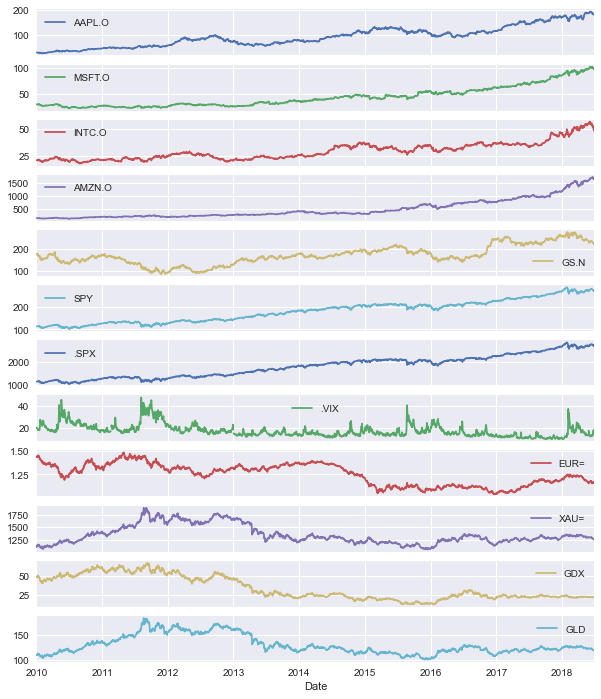

In [27]:
data.plot(figsize=(10,12),subplots=True)

<AxesSubplot:>

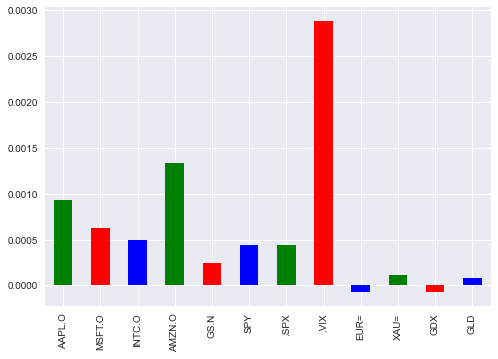

In [28]:
# pct_change表示当前元素与先前元素的相差百分比
# kind='bar',color=['g','r','b']表示绘制柱状图，有g(GREEN),r(RED),b(BLUE)
data.pct_change().mean().plot(kind='bar',color=['g','r','b'])

In [29]:
# data.shift（1)表示将数据向下移动一位
rets = np.log(data / data.shift(1))


In [30]:
# 每一天 相对于 初始日期的 收益率
# cumsum函数用于计算各行累加值
pr = np.cumsum(rets).apply(np.exp)

<AxesSubplot:xlabel='Date'>

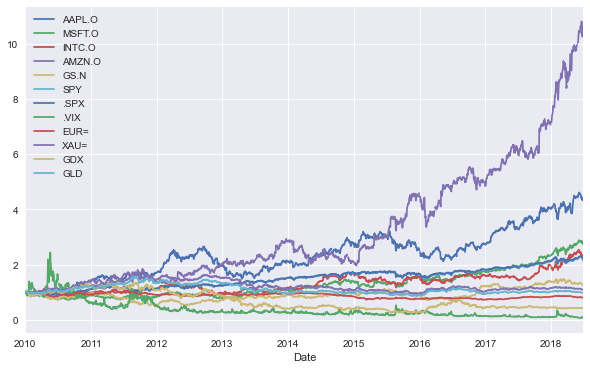

In [31]:
# 绘图，设置长为10，宽为6
pr.plot(figsize=(10,6))

### 投资分析
1. 双均线分析策略
2. 短期/长期均线分析
3. 黄金交叉/死亡交叉

In [32]:
windows = 50

In [33]:
# 1. 筛选出 APPLE 的股票曲线

apple = data[['AAPL.O']].dropna()

In [34]:
# 2. 双均线分析
apple['short'] = apple['AAPL.O'].rolling(window=50).mean()
apple['long'] = apple['AAPL.O'].rolling(window=250).mean()

<AxesSubplot:xlabel='Date'>

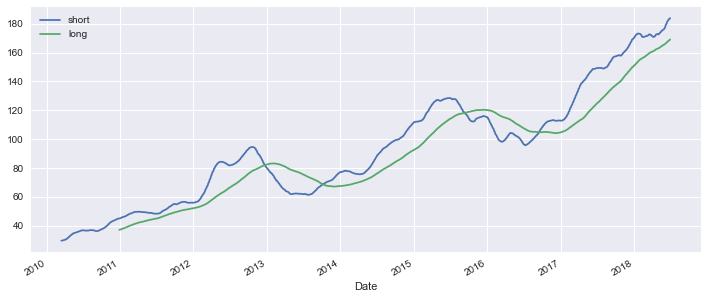

In [35]:
apple[['short','long']].plot(figsize=(12,5))

In [36]:
apple['position'] = np.where(apple['short'] > apple['long'],1,-1)

<AxesSubplot:xlabel='Date'>

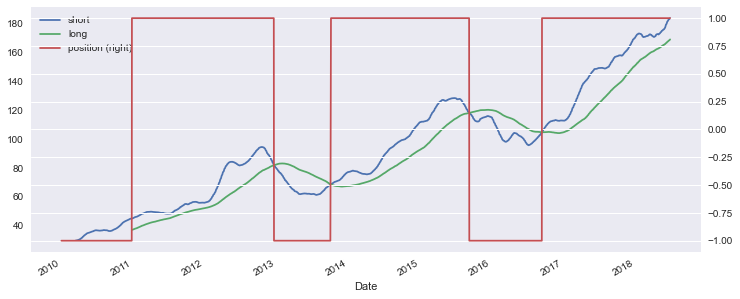

In [37]:
apple[['short','long','position']].plot(figsize=(12,5),secondary_y='position')

In [38]:
# 测试代码
golden = []
for i in range(50,len(apple)):
    # 黄金交叉
    if(apple['short'][i-1]<apple['long'][i-1])&(apple['short'][i]>=apple['long'][i]):
        golden.append(i)
print(50,'日短线')
print(250,'日长线')
print(apple['position'][golden[0]-1])
print(apple['position'][golden[0]])
# print(apple['short'][golden])
print("实现最大收益，可选最佳买入时间为：")
for i in range(0,len(apple.axes[0][golden])):
    print(apple.axes[0][golden][i])

50 日短线
250 日长线
-1
1
实现最大收益，可选最佳买入时间为：
2013-10-07 00:00:00
2016-09-15 00:00:00


In [39]:
#封装成寻找黄金交叉点的函数，参数为短均线和长均线的滑动窗口大小
def golden_cross_buy(short,long):
    golden = []
    apple['short'] = apple['AAPL.O'].rolling(window=short).mean()
    apple['long'] = apple['AAPL.O'].rolling(window=long).mean()
    apple['position'] = np.where(apple['short'] > apple['long'],1,-1)
    apple[['short','long','position']]
    for i in range(short,len(apple)):
        # 黄金交叉
        if(apple['short'][i-1]<apple['long'][i-1])&(apple['short'][i]>=apple['long'][i]):
            golden.append(i)
    print(short,'日短线')
    print(long,'日长线')
    print("基于金叉买入实现最大收益，可选最佳买入时间为：")
    for i in range(0,len(apple.axes[0][golden])):
        print(apple.axes[0][golden][i])
        

### 可选的short和long大小
> short = range(30,51,2)
> 
> long = range(180,281,10)

In [40]:
golden_cross_buy(50,250)

50 日短线
250 日长线
基于金叉买入实现最大收益，可选最佳买入时间为：
2013-10-07 00:00:00
2016-09-15 00:00:00


In [41]:
result = []

In [42]:
# 原本的收益率
apple['rets'] = np.log(apple['AAPL.O'])-np.log(apple['AAPL.O'].shift(1))
# 双均线策略的收益率
apple['stategy'] = apple['position'].shift(1) * apple['rets']
apple.dropna(inplace=True)

In [43]:
result.append(np.exp(apple[['rets','stategy']].sum()))
result

[rets       3.981231
 stategy    4.412739
 dtype: float64]

In [44]:
def dou_ave_strategy(short,long):
    apple = data[['AAPL.O']].dropna()
    apple['short'] = apple['AAPL.O'].rolling(window=short).mean()
    apple['long'] = apple['AAPL.O'].rolling(window=long).mean()
    apple['position'] = np.where(apple['short'] > apple['long'],1,-1)
    # 原本的收益率
    apple['rets'] = np.log(apple['AAPL.O']/apple['AAPL.O'].shift(1))
    #apple['rets'] = np.log(apple['AAPL.O'])-np.log(apple['AAPL.O'].shift(1))
    # 双均线策略的收益率
    apple['stategy'] = apple['position'].shift(1) * apple['rets']
    apple.dropna(inplace=True)
    return np.exp(apple[['rets','stategy']].sum())
    

In [45]:
dou_ave_strategy(50,250)

rets       3.981231
stategy    4.412739
dtype: float64

In [46]:
def Max_benefit():
    result = []
    max = 0
    i = -1
    for short in range(30,51,2):
        for long in range(180,281,10):
            res = dou_ave_strategy(short,long)
            result.append(res)
            i = i + 1
            if max < res['stategy']:
                max = res['stategy']
                Short = short
                Long  = long
                tmp = i
    return Short,Long,tmp,result

In [47]:
Short,Long,tmp,result = Max_benefit()
tmp

45

In [48]:
print("使用双均线策略，实现最大收益率的short",Short,"long为",Long)
print("此时的原收益与策略收益为")
print(result[tmp])

使用双均线策略，实现最大收益率的short 38 long为 190
此时的原收益与策略收益为
rets       4.586476
stategy    7.614365
dtype: float64
